<a href="https://colab.research.google.com/github/sradhass88/Assignments/blob/main/Sradha_S_Case_Study_on_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Case Study on Regression**

The given dataset contains price of second-hand Hyundai grand i10 car with
respect to year of making. Find the best linear relationship between year and
price. Can you predict the possible price of a 2022 model second-hand grand i10?
Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better

In [35]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
data = pd.read_csv('/content/car_age_price.csv')
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [3]:
data.shape

(112, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [6]:
# checking the missing values
data.isnull().sum()

Year     0
Price    0
dtype: int64

In [7]:
data['Year'].unique()

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014])

In [8]:
data['Price'].unique()

array([465000, 755000, 700000, 350000, 425000, 575000, 509999, 500000,
       600000, 475000, 550000, 434999, 650000, 450000, 486000, 545000,
       525000, 396000, 325000, 345000, 341000, 490000, 540000, 595000,
       495000, 400000, 300000, 320000, 409999, 390000, 480000, 520000,
       640000, 375000, 420000])

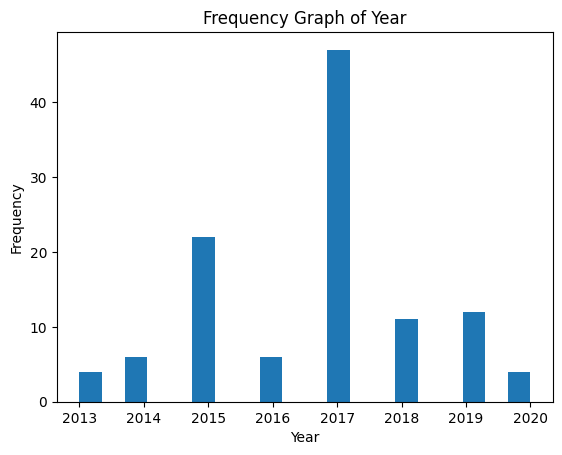

In [9]:
# VISUALAIZATION
plt.hist(data['Year'], bins = 20)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency Graph of Year')
plt.show()

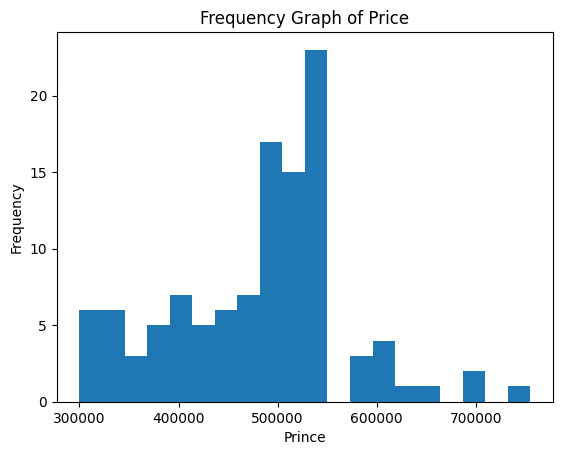

In [10]:
plt.hist(data['Price'], bins = 20)
plt.xlabel('Prince')
plt.ylabel('Frequency')
plt.title('Frequency Graph of Price')
plt.show()

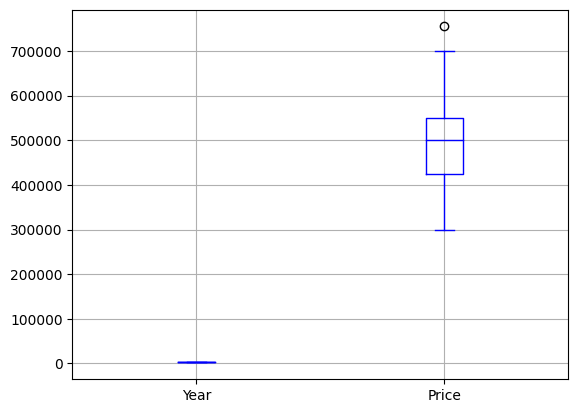

In [44]:
# Check for outliers using boxplot
data.boxplot(color='blue')
plt.show()

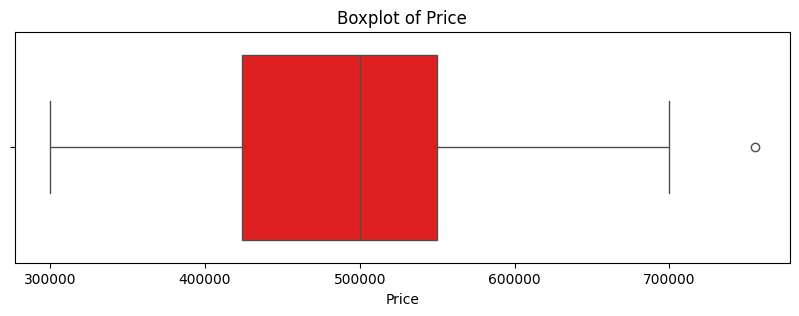

In [13]:
# Boxplot of Price
plt.figure(figsize=(10, 3))
sns.boxplot(x=data['Price'],color='red')
plt.title('Boxplot of Price')
plt.show()

In [14]:
# Detecting outliers using IQR
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1
# Define outlier boundaries
outlier_lower = data['Price'] < (Q1-1.5*IQR)
outlier_upper = data['Price'] < (Q3+1.5*IQR)

In [15]:
# Clip the outliers
clipped_price = data['Price'].clip(lower = Q1-1.5*IQR, upper = Q3+1.5*IQR)

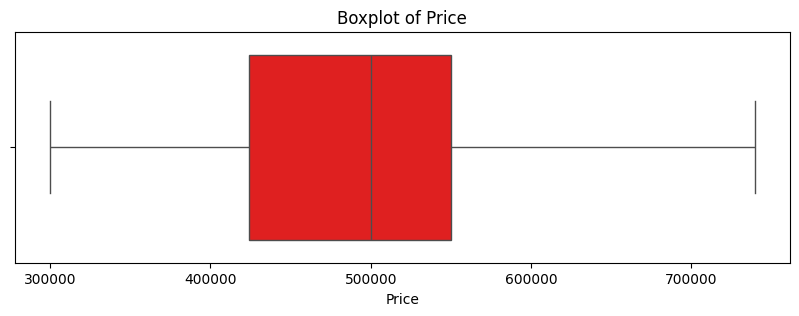

In [38]:
# Plot the Clipped price
plt.figure(figsize=(10, 3))
sns.boxplot(x=clipped_price, color='red')
plt.title('Boxplot of Price')
plt.show()

In [17]:
# Describe clipped_price
clipped_price.describe()

count       112.000000
mean     483726.535714
std       90810.078466
min      300000.000000
25%      423750.000000
50%      500000.000000
75%      550000.000000
max      739375.000000
Name: Price, dtype: float64

In [18]:
# Replacing Price by clipped_price
data['Price']=clipped_price
data

,Year,Price
0,2018,465000
1,2019,739375
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [36]:
# Split the data into training and testing sets
X = data[['Year']]
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Lasso Regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the models
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print the evaluation metrics
print(f'Linear Regression MSE: {mse_linear}')
print(f'Linear Regression R²: {r2_linear}')
print(f'Lasso Regression MSE: {mse_lasso}')
print(f'Lasso Regression R²: {r2_lasso}')

Linear Regression MSE: 4296980485.322585
Linear Regression R²: 0.3719669899056065
Lasso Regression MSE: 4296975894.993172
Lasso Regression R²: 0.37196766081356347


Both models have similar performance, with the lasso regression performing marginally better in terms of MSE. The R-squared value for both models is around 0.3719, indicating that approximately 37.19% of the variance in the price can be explained by the year of making.

**Predicting the Price of a 2022 Model**

Since both models have nearly identical performance, we can use either to predict the price of a 2022 model. Let's use the lasso regression model for this prediction.

In [51]:
# Prediction using Lasso regression model
predicted_price_2022 = lasso_model.predict([[2022]])
print(f'The predicted price of a 2022 model second-hand Hyundai Grand i10 is:\n{predicted_price_2022[0]}')

The predicted price of a 2022 model second-hand Hyundai Grand i10 is:
742466.2700041682


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [45]:
predicted_price_2022[0]

742466.2700041682